In [1]:
# import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the heart disease data
heart_disease = pd.read_csv('HeartDiseaseUCI.csv', index_col='Unnamed: 0')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


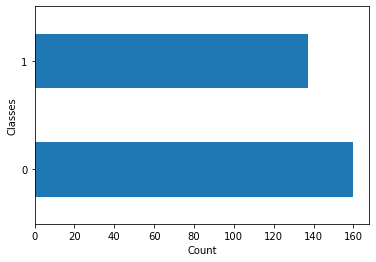

In [4]:
# replace the last variable by a binary variable and delete missing values
heart_disease['num'] = heart_disease['num'].mask(heart_disease['num'] != 0, 1)
heart_disease = heart_disease.dropna()

# plotting a graph to see class imbalance
heart_disease['num'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [5]:
# get encoding on categorical variables
heart_disease[['cp', 'slope']].apply(lambda x: x.astype('category'))
heart_disease = pd.get_dummies(heart_disease, columns=["cp"], prefix=["cp"])
heart_disease = pd.get_dummies(heart_disease, columns=["slope"], prefix=["slope"])
heart_disease.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num,cp_1,cp_2,cp_3,cp_4,slope_1,slope_2,slope_3
1,63,1,145,233,1,2,150,0,2.3,0.0,6.0,0,1,0,0,0,0,0,1
2,67,1,160,286,0,2,108,1,1.5,3.0,3.0,1,0,0,0,1,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2.0,7.0,1,0,0,0,1,0,1,0
4,37,1,130,250,0,0,187,0,3.5,0.0,3.0,0,0,0,1,0,0,0,1
5,41,0,130,204,0,2,172,0,1.4,0.0,3.0,0,0,1,0,0,1,0,0


In [6]:
# perform scaling on the data
X = heart_disease.drop('num', axis = 1)
Y = heart_disease['num']
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=heart_disease.drop("num",axis = 1).columns)

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)
X_train = X_train.values
X_test = X_test.values

In [7]:
# build from scratch the perceptron
class Perceptron_original:
  
  # constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  # model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) + self.b >= 0) else 0
  
  # predictor to predict on the data based on w
  def predict(self, X):
    Y = map(self.model, X)
    Y = np.array(list(Y))
    return Y
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    
    # for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    
    # checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
            
    # plot the accuracy values over epochs
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()
  

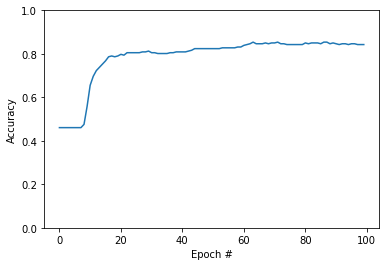

Mean Accuracy: 0.833


In [8]:
perceptron = Perceptron_original()

# epochs = 100 and lr = 0.001
perceptron.fit(X_train, Y_train, 100, 0.001)

# making predictions on test data
Y_pred_test = perceptron.predict(X_test)

# checking the accuracy of the model
print('Mean Accuracy: %.3f' % accuracy_score(Y_pred_test, Y_test))

In [9]:
# grid search learning rate for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import Perceptron

# define model
model = Perceptron()

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in X.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['max_iter'] = [100, 1000, 10000]

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=pds, n_jobs=-1)

# perform the search
results = search.fit(X, Y)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

# best result
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

>0.700 with: {'eta0': 0.0001, 'max_iter': 100}
>0.700 with: {'eta0': 0.0001, 'max_iter': 1000}
>0.700 with: {'eta0': 0.0001, 'max_iter': 10000}
>0.700 with: {'eta0': 0.001, 'max_iter': 100}
>0.700 with: {'eta0': 0.001, 'max_iter': 1000}
>0.700 with: {'eta0': 0.001, 'max_iter': 10000}
>0.700 with: {'eta0': 0.01, 'max_iter': 100}
>0.700 with: {'eta0': 0.01, 'max_iter': 1000}
>0.700 with: {'eta0': 0.01, 'max_iter': 10000}
>0.767 with: {'eta0': 0.1, 'max_iter': 100}
>0.767 with: {'eta0': 0.1, 'max_iter': 1000}
>0.767 with: {'eta0': 0.1, 'max_iter': 10000}
>0.767 with: {'eta0': 1.0, 'max_iter': 100}
>0.767 with: {'eta0': 1.0, 'max_iter': 1000}
>0.767 with: {'eta0': 1.0, 'max_iter': 10000}
Mean Accuracy: 0.767
Config: {'eta0': 0.1, 'max_iter': 100}
